# HW1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](https://www.safaribooksonline.com/library/view/mining-the-social/9781491973547/?orpq) 
* The codes for Chapters 1 and 9 are in [here](https://github.com/mikhailklassen/Mining-the-Social-Web-3rd-Edition/tree/master/notebooks).

** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

## Data Collection: Download Twitter Data using API

* As the first step of Data Science process, let's collect some twitter data. Choose a keyword and search tweets containing the keyword by using Twitter search API, and then download the searched tweets (including the meta data that the Search API returns) in a file. It is recommended that the number of searched tweets should be at least 300.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [1]:
# What keyword did you choose?:  pathofexile

In [2]:
import twitter
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'qfmJS7ENEP9TVJuYRvZyzPJp3'
    CONSUMER_SECRET ='TdI8NevvXa9S2DUoI5XDSKON71O4qPWVLe0eR0ohapeCsZHDCC'
    OAUTH_TOKEN = '1107694712746663936-DOU3iCtCX5Y3HEIauc2TqZPLBD219b'
    OAUTH_TOKEN_SECRET = 'Q26XmqEwlGaRGMl0KlLL51731PZhFzRHudnFV0zHOSuga'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

api = oauth_login()

# print(api) # basically just check that it worked

import json
from urllib.parse import unquote

# now, collect tweets by searching for a keyword

# collect <pages> pages of <count> length from keyword <keyword>
# collect 5 pages of 100 length from keyword pathofexile
keyword = 'pathofexile'
count = 100
pages = 5

results = api.search.tweets(q=keyword, count=count)

statuses = results['statuses']

# collect the rest of the tweets (Code taken from the first example on the github linked above)
for _ in range(pages-1): # subtract 1 because i only want count*pages number of tweets
    try:
        next_results = results['search_metadata']['next_results']
    except KeyError as e:
        break
        
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    results = api.search.tweets(**kwargs)
    statuses += results['statuses']

# now log the statuses to a file
with open('statuses.json', 'w') as outfile:
    json.dump(statuses, outfile)


### Report  statistics about the tweets you collected 

In [3]:
# The total number of tweets collected:  500
# Not sure, am I supposed to print here, or just leave the comment?

# NOTE: requires the previous block to have run first!
print('How many tweets collected: ', len(statuses))



How many tweets collected:  500


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [4]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import json

# read in the json file
with open('statuses.json') as json_file:  
    data = json.load(json_file)
    
# print(data) # verify it read the data in (it did)

# grab the text from the statuses data
texts = [ status['text']
        for status in data]

# grab the words from texts
words = [w for t in texts for w in t.split()]

# verify
# print(len(texts))
# print(texts)
# print(len(words))
# print(words)

import collections
# print top n frequent words
n = 30

from prettytable import PrettyTable

print("Top 30 most frequent words from collected tweets")
# i had a conflict in names, so instead of data, am using dataaa
for label, dataaa in (('Word', words),): # needed this stray comma because otherwise it didn't recognize it as a tuple
    pt = PrettyTable(field_names=[label, 'Count'])
    c = collections.Counter(dataaa) # create the counts of the data
    
    [pt.add_row(kv) for kv in c.most_common()[:n]]
    pt.align[label], pt.align['Count'] = 'l', 'r'
    print(pt)


Top 30 most frequent words from collected tweets
+------------------+-------+
| Word             | Count |
+------------------+-------+
| @pathofexile     |   242 |
| the              |   149 |
| RT               |   141 |
| to               |   140 |
| a                |   114 |
| and              |    98 |
| for              |    92 |
| of               |    87 |
| on               |    68 |
| #pathofexile     |    62 |
| I                |    61 |
| with             |    58 |
| my               |    52 |
| in               |    49 |
| is               |    47 |
| have             |    43 |
| you              |    42 |
| that             |    39 |
| The              |    39 |
| your             |    38 |
| @ZiggyDStarcraft |    37 |
| this             |    36 |
| be               |    34 |
| it               |    34 |
| Path             |    34 |
| our              |    34 |
| just             |    33 |
| -                |    30 |
| @pathofexile:    |    30 |
| are              |   

** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [5]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# NOTE: This assumes the previous block has been run and the status data variable "data" exists

# code is adapted from link above: https://github.com/mikhailklassen/Mining-the-Social-Web-3rd-Edition/blob/master/notebooks/Chapter%201%20-%20Mining%20Twitter.ipynb
retweets = { # Using a set, because an array resulted in repeats where 4 of them were the same #1, and the rest were the same #2
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            for status in data 
                if 'retweeted_status' in status.keys()
            }

# take the first num (10) values
num = 10
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:num] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)


+-------+-----------------+---------------------+----------------------------------------------------+
| Count | Screen Name     | Tweet ID            | Text                                               |
+-------+-----------------+---------------------+----------------------------------------------------+
| 608   | pathofexile     | 1105598772199854080 | RT @pathofexile: We are excited to announce that   |
|       |                 |                     | Path of Exile and our latest expansion, Synthesis, |
|       |                 |                     | will be coming to PlayStation 4 on Marc…           |
| 26    | ZiggyDStarcraft | 1107565505609490432 | RT @ZiggyDStarcraft: The perfect @pathofexile item |
|       |                 |                     | doesn't exi..... https://t.co/NJc59y1Ool           |
| 20    | pathofexile     | 1107486361840320512 | RT @pathofexile: We've just introduced the         |
|       |                 |                     | Lightning Character Eff

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

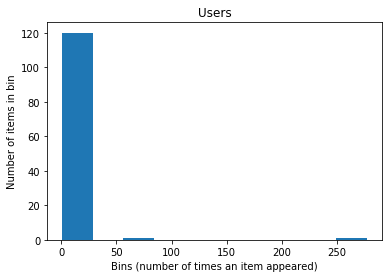

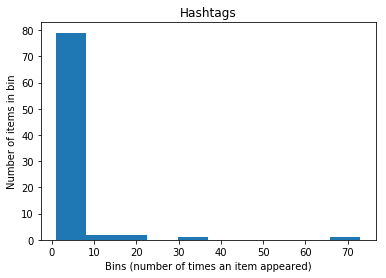

<Figure size 432x288 with 0 Axes>

In [6]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

users = [user_mention['screen_name'] for status in data for user_mention in status['entities']['user_mentions']]
hashtags = [hashtag['text'] for status in data for hashtag in status['entities']['hashtags']]

# plot the users mentioned and the hashtags
for label, data in (('Users', users), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

Plot a histogram of the number of user mentions in the list using the following bins.

Text(0, 0.5, 'Number of mentions in bin')

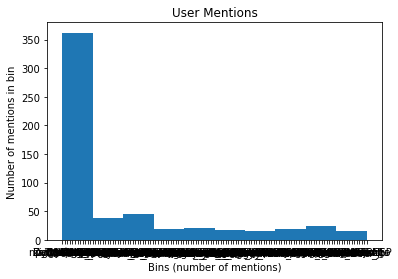

In [7]:
bins=[0, 10, 20, 30, 40, 50, 100]

# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# the labels look terrible, but this does the trick
plt.hist(users)
plt.title('User Mentions')
plt.xlabel('Bins (number of mentions)')
plt.ylabel('Number of mentions in bin')




 ** (optional task for fun) Getting "All" friends (followees) and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [8]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#pass

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

** How to submit: **

        Please submit through Canvas, in the Assignment "HW1".
        